In [1]:
import nibabel as nib
import numpy as np
from sklearn.cluster import KMeans
import os
import cv2
import matplotlib.pyplot as plt
from normalization import intensity_normalization
from scipy.stats import skew, kurtosis

In [2]:
def plot_clusters(cluster_1,cluster_2,cluster_3,title = None,hight = 350):
    plt.figure(figsize=(14, 6))
    plt.bar(range(255), cluster_1, width=1, edgecolor="black",alpha=0.5,color = 'red',label='Low intensity')
    plt.bar(range(255), cluster_2, width=1, edgecolor="black",alpha=0.5,color = 'PaleGreen',label='Median intensity')
    plt.bar(range(255), cluster_3, width=1, edgecolor="black",alpha=0.5,color = 'blue',label='High intensity')
    plt.title(f"Intensity Histogram: {title}", fontsize=14)
    plt.xlabel("Intensity Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.ylim(0, hight)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', fontsize=12)
    plt.show()
    plt.savefig(f"/Volumes/Elements/Clustering_T2/Hist-all-images/{title}.png", dpi=300, bbox_inches='tight')
    plt.close()

# Get clustering information

In [5]:
cluster_dir = '/Volumes/Elements/Clustering_T2/kmeans Clusters_3'
# image_dir = '/Volumes/Elements/IPMN_images_masks/t2/images'
image_dir = '/Volumes/Elements/Clustering_T2/intensity_normalized'

cluster_dict = {}

for name in os.listdir(image_dir):
    try:
        image_path = os.path.join(image_dir,name)
        img = nib.load(image_path)
        img_np = img.get_fdata()
        
        # Load clusters label
        clusters_path = os.path.join(cluster_dir,name)
        clusters = nib.load(clusters_path)
        clusters_np = clusters.get_fdata()
        # segmentation mask
        mask = clusters_np.copy()
        mask[mask != 0] = 1

        # Get the pancreas rigion
        clean_data = mask*img_np
        
        # Normalization
        # clean_data = intensity_normalization(clean_data)

        # match the corresponding cluster region
        mask_1 = (clusters_np == 1)
        mask_2 = (clusters_np == 2)
        mask_3 = (clusters_np == 3)
        cluster_1 = np.where(mask_1, clean_data, 0)
        cluster_2 = np.where(mask_2, clean_data, 0)
        cluster_3 = np.where(mask_3, clean_data, 0)
        cluster_dict[name] = {'cluster_1':cluster_1,'cluster_2':cluster_2,'cluster_3':cluster_3}
    except Exception as e:
        print(f'Error occured:{e}')

Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_02.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_05.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_09.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_11.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_12.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_16.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_21.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_normalized/._ahn_27.nii.gz"
Error occured:Cannot work out file type of "/Volumes/Elements/Clustering_T2/intensity_no

In [6]:
def get_avg_cluster_hist(cluster_dict:dict, sub_list = None):
    if sub_list is None:
        sub_list = cluster_dict.keys()
    
    avg_cluster_1 =np.zeros(255)
    avg_cluster_2 =np.zeros(255)
    avg_cluster_3 =np.zeros(255)
    
    for key in sub_list:
        cluster_1 = cluster_dict[key]['cluster_1']
        cluster_2 = cluster_dict[key]['cluster_2']
        cluster_3 = cluster_dict[key]['cluster_3']
        avg_cluster_1 += np.histogram(cluster_1, bins=255, range=(1, 255))[0]
        avg_cluster_2 += np.histogram(cluster_2, bins=255, range=(1, 255))[0]
        avg_cluster_3 += np.histogram(cluster_3, bins=255, range=(1, 255))[0]
    
    avg_cluster_1 = avg_cluster_1/len(sub_list)
    avg_cluster_2 = avg_cluster_2/len(sub_list)
    avg_cluster_3 = avg_cluster_3/len(sub_list)
    return avg_cluster_1,avg_cluster_2,avg_cluster_3

def get_total_cluster(cluster_dict:dict, sub_list = None):
    if sub_list is None:
        sub_list = cluster_dict.keys()
    
    avg_cluster_1 =[]
    avg_cluster_2 =[]
    avg_cluster_3 =[]
    
    for key in sub_list:
        cluster_1 = cluster_dict[key]['cluster_1'].flatten()
        cluster_2 = cluster_dict[key]['cluster_2'].flatten()
        cluster_3 = cluster_dict[key]['cluster_3'].flatten()
        avg_cluster_1.append(cluster_1)
        avg_cluster_2.append(cluster_2)
        avg_cluster_3.append(cluster_3)
    total_cluster_1 = np.concatenate(avg_cluster_1)
    total_cluster_2 = np.concatenate(avg_cluster_2)
    total_cluster_3 = np.concatenate(avg_cluster_3)
    return total_cluster_1,total_cluster_2,total_cluster_3


In [7]:
def lowercase_keys(d):
    if isinstance(d, dict):
        return {key.lower(): lowercase_keys(value) for key, value in d.items()}
    else:
        return d
lowercase_dict = lowercase_keys(cluster_dict)

## Intensity Distribution
The visualization contains 4 parts, whole dataset, center-wise comparison, risk-wise comparison


# Whole dataset


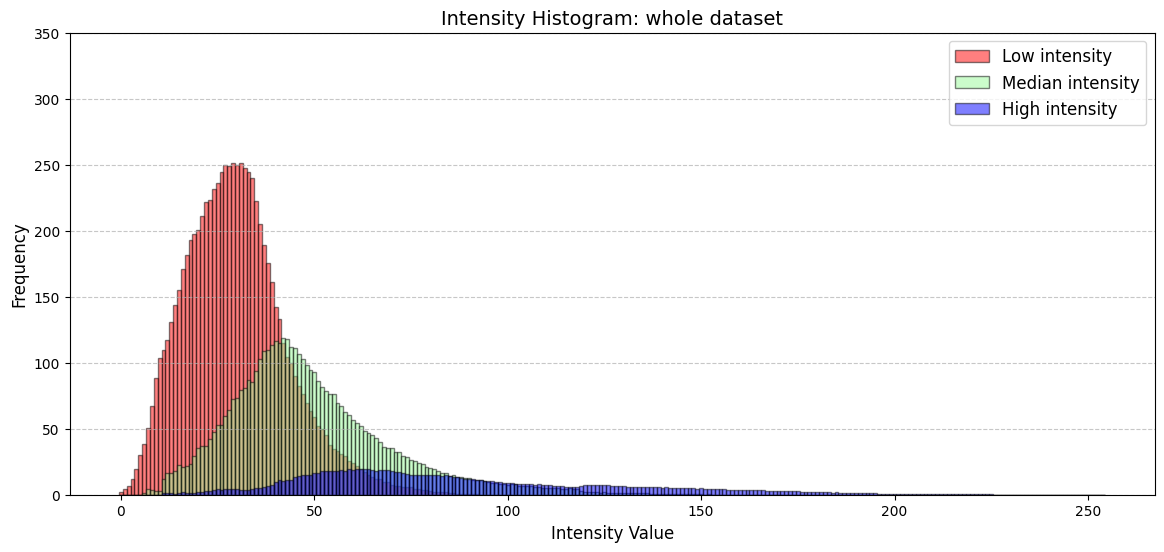

In [6]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict)
total_1,total_2,total_3= get_total_cluster(lowercase_dict)
plot_clusters(avg_1,avg_2,avg_3,title='whole dataset')

In [6]:
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

NameError: name 'avg_1' is not defined

Read the dataset information

In [8]:
import pandas as pd
label = pd.read_excel('/Volumes/Elements/IPMN_images_masks/IPMN_labels_t2_total.xlsx')[['name','risk assessment']]

In [9]:
label['name'] = label['name'].apply(lambda x: x+'.nii.gz' if not x.endswith('.nii.gz') else x)
label['name'] = label['name'].apply(lambda x: x.lower())

In [10]:
low_grade = label[label['risk assessment']==1]
high_grade = label[label['risk assessment']==2]
none_grade = label[label['risk assessment']==0]

None Grade

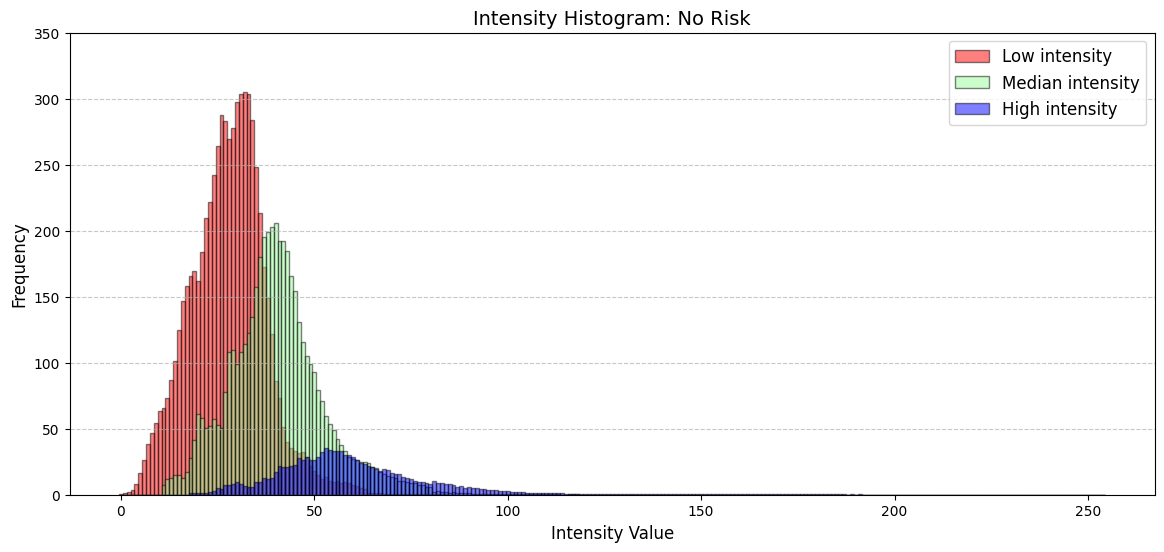

Skew:
Low intensity:  2.8630461450762748 Median intensity:  2.773224153488114 High intensity:  2.0349632187702915
Kurtosis:
Low intensity:  7.130053679838104 Median intensity:  7.020224054128596 High intensity:  3.0931562081581507
Mean:
Low intensity:  28.827225893428984 Median intensity:  41.475300507430326 High intensity:  61.298257996382155
Std:
Low intensity:  9.774564910006555 Median intensity:  12.604719876848785 High intensity:  21.992717673916303


In [10]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(none_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(none_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='No Risk')
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

low_grade

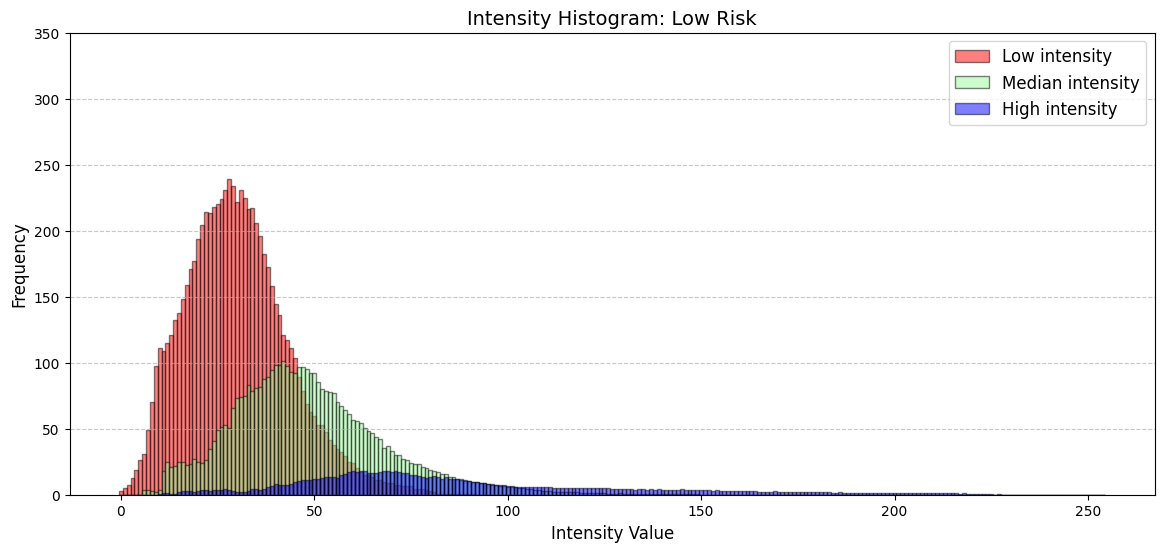

Skew:
Low intensity:  2.1479454396391895 Median intensity:  1.7356924404870007 High intensity:  1.2422948204930448
Kurtosis:
Low intensity:  3.2406777809423692 Median intensity:  1.679921642843241 High intensity:  0.468370979506167
Mean:
Low intensity:  31.10594748769123 Median intensity:  49.58474979673091 High intensity:  89.38758531466385
Std:
Low intensity:  13.476010639151145 Median intensity:  20.201565644698366 High intensity:  42.86360080929687


In [11]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='Low Risk')
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

In [13]:
print(total_3[total_3 != 0].mean(),
total_3[total_3 != 0].std(),
total_3[total_3 != 0].max(),
total_3[total_3 != 0].min())

89.38758531466385 42.86360080929687 250.0 11.0


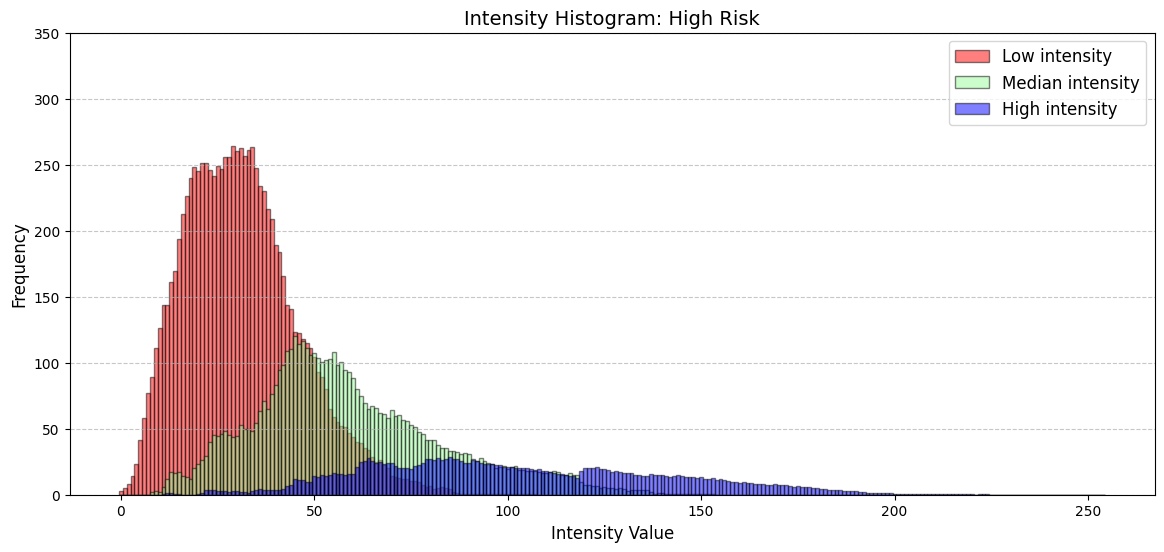

Skew:
Low intensity:  1.957876582521118 Median intensity:  1.5477841784327804 High intensity:  0.48270925149550986
Kurtosis:
Low intensity:  2.3539893469180226 Median intensity:  1.3478069222111593 High intensity:  -1.1774066743959264
Mean:
Low intensity:  32.35199622254817 Median intensity:  59.99688416976737 High intensity:  103.71051210438463
Std:
Low intensity:  14.959510536261238 Median intensity:  24.699272322757277 High intensity:  38.19424211176833


In [14]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='High Risk')
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

# Center-wise comparison

In [12]:
centers = ['nu','cad','emc','iu','ahn','nyu','northwestern','mca','mcf']
center_dfs = {}
for center in centers:
    center_dfs[center] = label[label['name'].str.contains(center, case=False, na=False)]

NU+northwestern

In [27]:
center_low_grade = pd.merge(low_grade, pd.concat([center_dfs['nu'], center_dfs['northwestern']], axis=0, ignore_index=True), on='name')
center_no_grade = pd.merge(none_grade, pd.concat([center_dfs['nu'], center_dfs['northwestern']], axis=0, ignore_index=True), on='name')
center_high_grade = pd.merge(high_grade, pd.concat([center_dfs['nu'], center_dfs['northwestern']], axis=0, ignore_index=True), on='name')

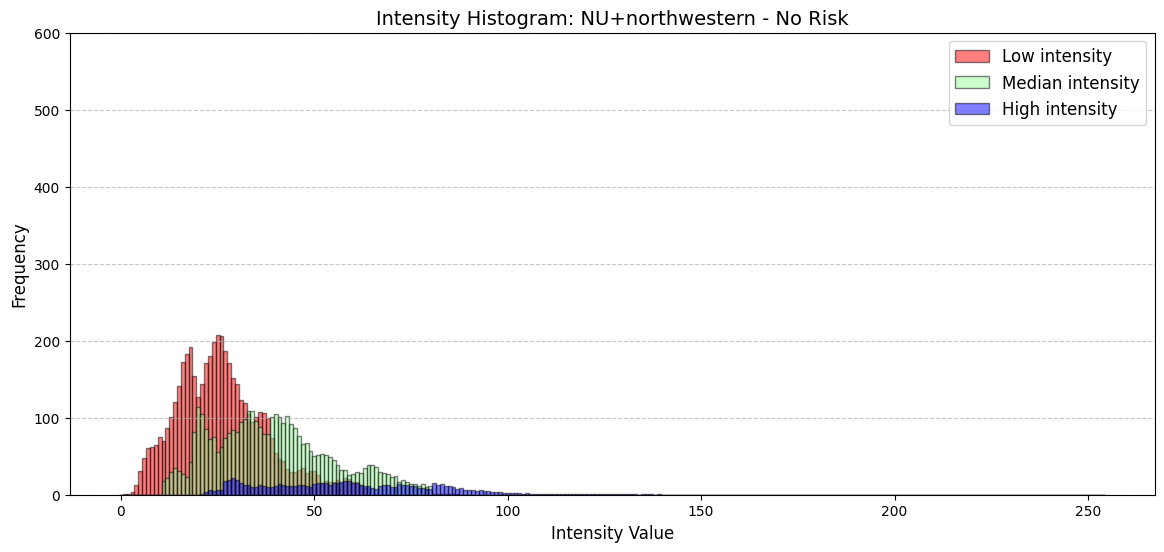

Skew:
Low intensity:  2.5758425197276127 Median intensity:  1.9430329184875526 High intensity:  1.3427943926689154
Kurtosis:
Low intensity:  5.665932921572008 Median intensity:  2.5193471099422817 High intensity:  0.4397396139866201
Mean:
Low intensity:  27.268710014065974 Median intensity:  40.48299230837763 High intensity:  60.51033293607526
Std:
Low intensity:  11.827554158075452 Median intensity:  15.74976463204667 High intensity:  23.49749211712862


In [28]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_no_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_no_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NU+northwestern - No Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

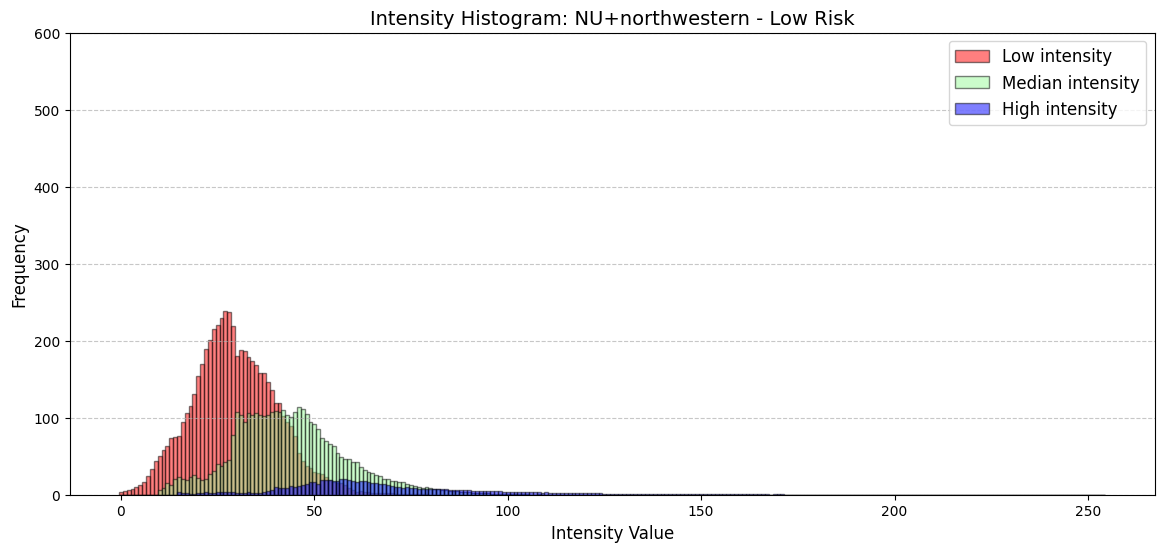

Skew:
Low intensity:  2.5593780539347852 Median intensity:  2.1996156679125223 High intensity:  1.861428114964452
Kurtosis:
Low intensity:  5.467122601041714 Median intensity:  3.5119707180691426 High intensity:  2.5347825599252687
Mean:
Low intensity:  30.409494051688775 Median intensity:  44.72742942259844 High intensity:  69.3580615568952
Std:
Low intensity:  11.03078091331249 Median intensity:  14.925028680329214 High intensity:  27.852761455494882


In [29]:

avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NU+northwestern - Low Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

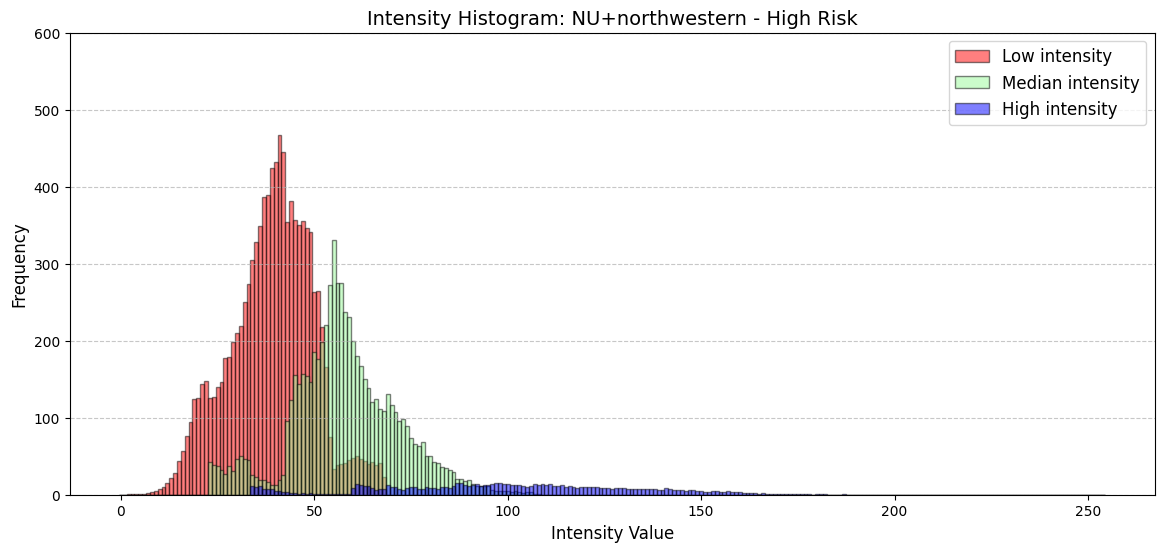

Skew:
Low intensity:  2.644768311196476 Median intensity:  2.727020164397617 High intensity:  0.7471853594837461
Kurtosis:
Low intensity:  5.960005717875092 Median intensity:  7.309953302492305 High intensity:  -0.9251417974435046
Mean:
Low intensity:  40.049642696042355 Median intensity:  58.873850405684244 High intensity:  101.38528112689507
Std:
Low intensity:  10.801164194549216 Median intensity:  13.998019987748577 High intensity:  32.32313608789218


In [30]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NU+northwestern - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

CAD

In [50]:
center_low_grade = pd.merge(low_grade, center_dfs['cad'], on='name')
center_no_grade = pd.merge(none_grade, center_dfs['cad'], on='name')
center_high_grade = pd.merge(high_grade, center_dfs['cad'], on='name')

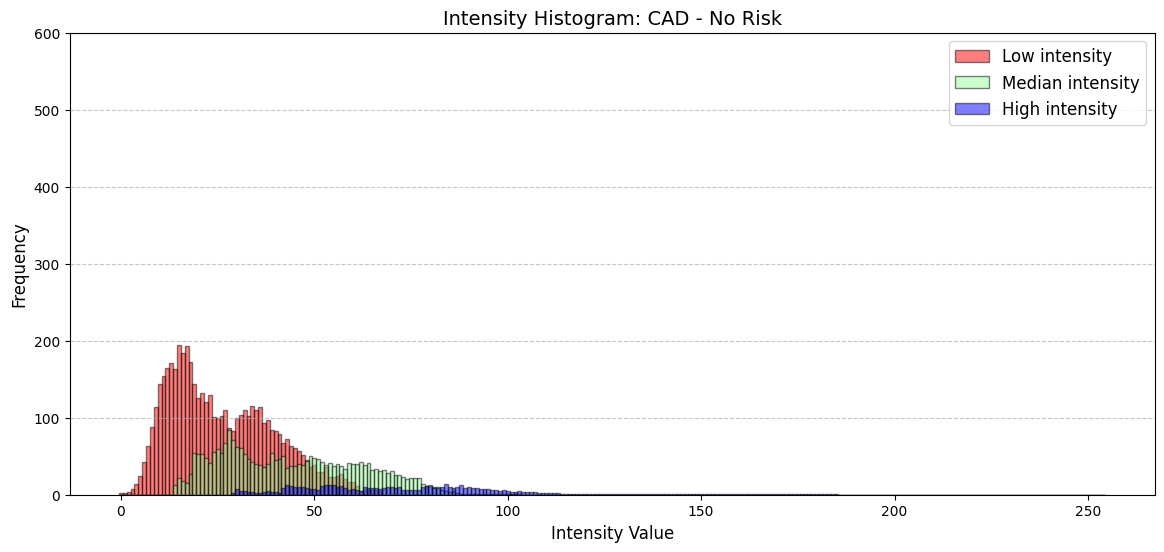

Skew:
Low intensity:  2.269475210065339 Median intensity:  1.5899375643619962 High intensity:  1.3372964321701168
Kurtosis:
Low intensity:  4.201268162273951 Median intensity:  1.3120562884700817 High intensity:  0.3821010256968491
Mean:
Low intensity:  27.235679919760535 Median intensity:  45.35145738238014 High intensity:  76.54188624386698
Std:
Low intensity:  13.588641051537277 Median intensity:  18.118256648245268 High intensity:  30.096267983220116


In [51]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_no_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_no_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='CAD - No Risk',hight=600)

print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

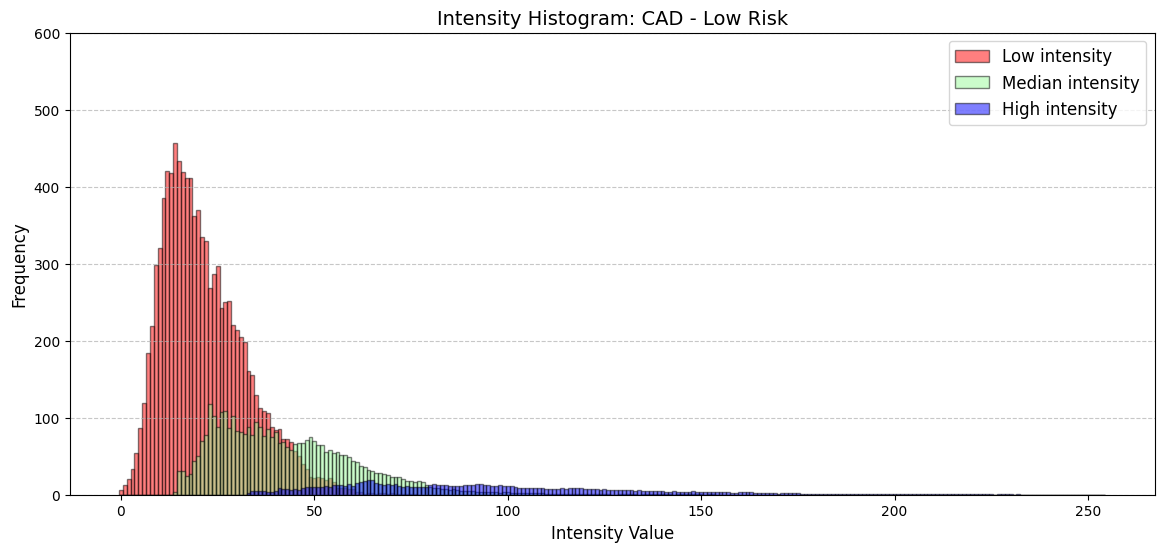

Skew:
Low intensity:  2.7186594391938947 Median intensity:  1.855380561227129 High intensity:  0.7860894707404873
Kurtosis:
Low intensity:  6.379319636824198 Median intensity:  2.210438147771499 High intensity:  -0.5952467641249362
Mean:
Low intensity:  22.67348944639654 Median intensity:  44.144590216333235 High intensity:  94.88470905350768
Std:
Low intensity:  11.00483474302914 Median intensity:  18.88040790151329 High intensity:  37.93773134507913


In [52]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='CAD - Low Risk',hight=600)

print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

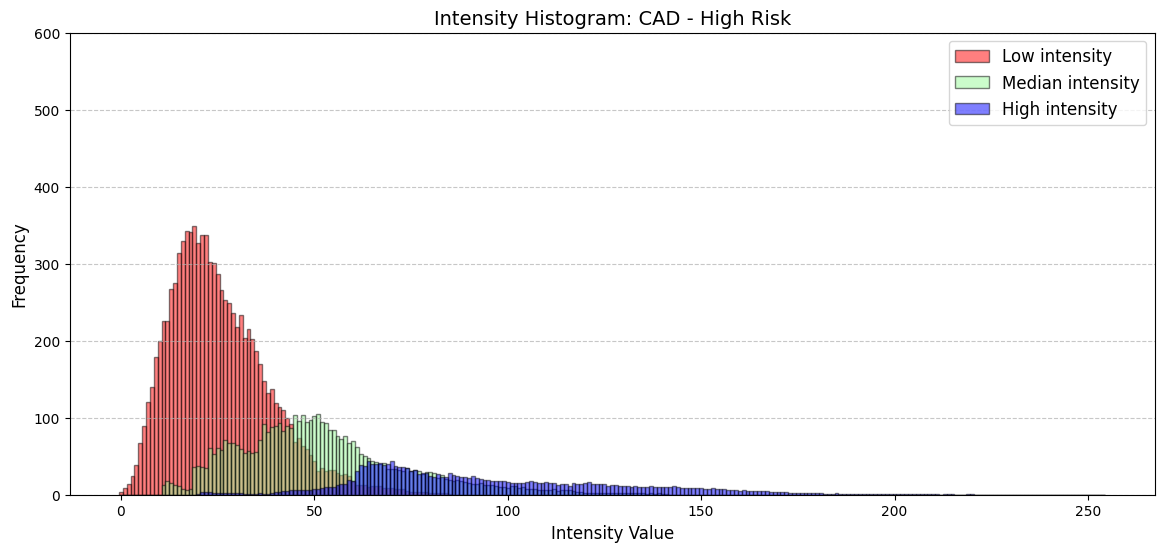

Skew:
Low intensity:  2.3735280822359526 Median intensity:  1.6576946723164838 High intensity:  1.490680117090421
Kurtosis:
Low intensity:  4.422326930976494 Median intensity:  1.4934889221879306 High intensity:  1.6303557715025097
Mean:
Low intensity:  26.613349075395902 Median intensity:  53.04460816786923 High intensity:  95.87585697808535
Std:
Low intensity:  13.019946658459553 Median intensity:  22.30077375408285 High intensity:  34.57322600576231


In [53]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='CAD - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

EMC

In [54]:
center_low_grade = pd.merge(low_grade, center_dfs['emc'], on='name')
center_no_grade = pd.merge(none_grade, center_dfs['emc'], on='name')
center_high_grade = pd.merge(high_grade, center_dfs['emc'], on='name')

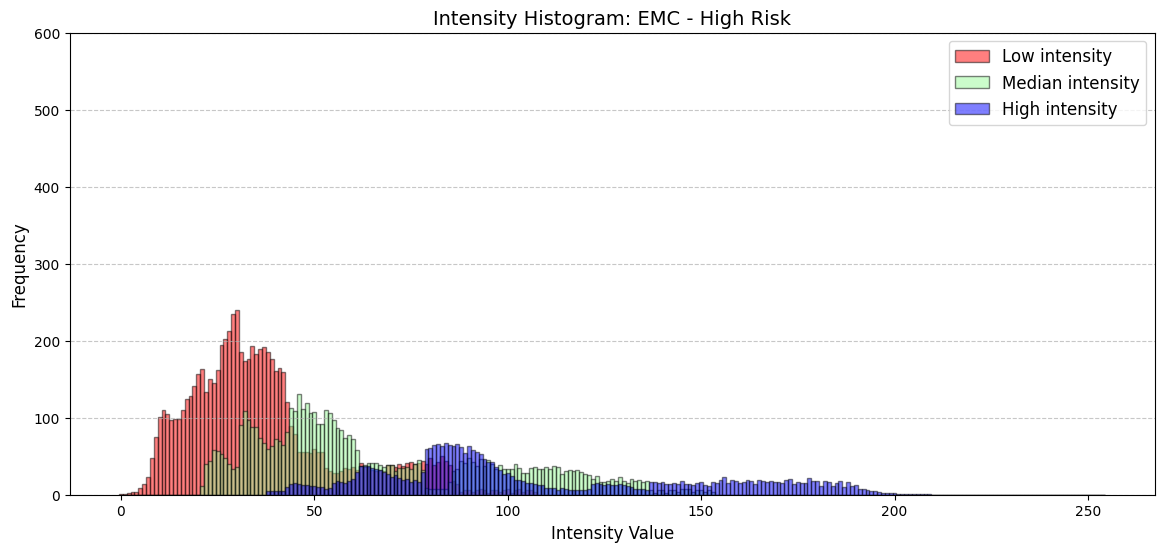

Skew:
Low intensity:  2.088475619786223 Median intensity:  1.5442867905102045 High intensity:  1.822259395486877
Kurtosis:
Low intensity:  3.325361347824873 Median intensity:  1.7124022531674195 High intensity:  3.2434371833075595
Mean:
Low intensity:  38.150086092301656 Median intensity:  67.33738458753244 High intensity:  108.48754091653028
Std:
Low intensity:  20.063048233758828 Median intensity:  31.6136059359837 High intensity:  41.052343342019775


In [55]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='EMC - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

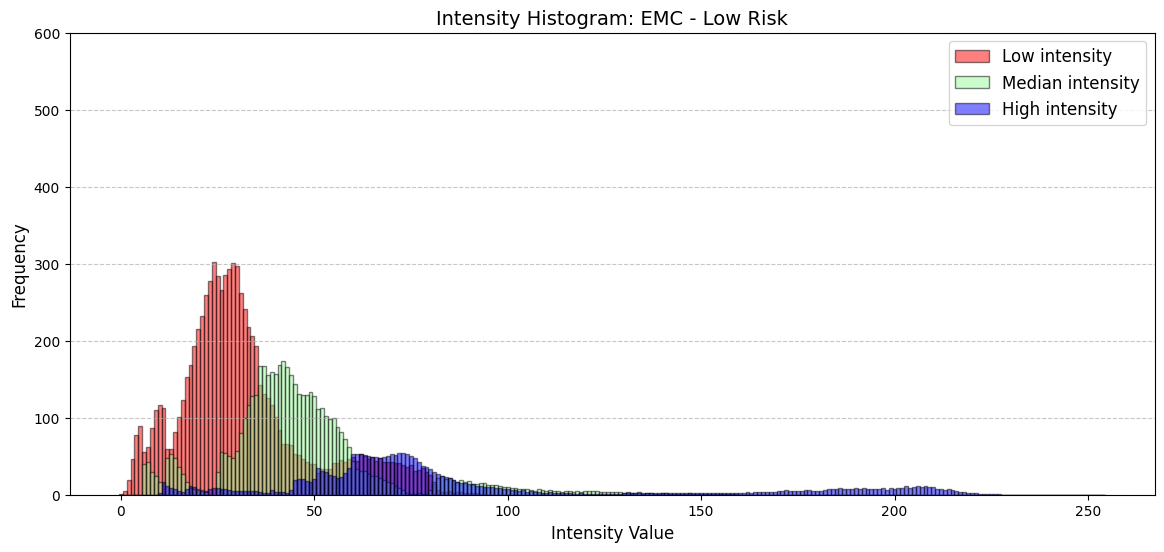

Skew:
Low intensity:  2.600002898616245 Median intensity:  2.4045982944197077 High intensity:  2.130736345013397
Kurtosis:
Low intensity:  6.135708656897563 Median intensity:  4.733226252116343 High intensity:  3.6227075616946918
Mean:
Low intensity:  32.99562908891682 Median intensity:  48.356687570679554 High intensity:  89.67648744541485
Std:
Low intensity:  17.503927941563678 Median intensity:  22.445391042607604 High intensity:  51.69336334552051


In [56]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='EMC - Low Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

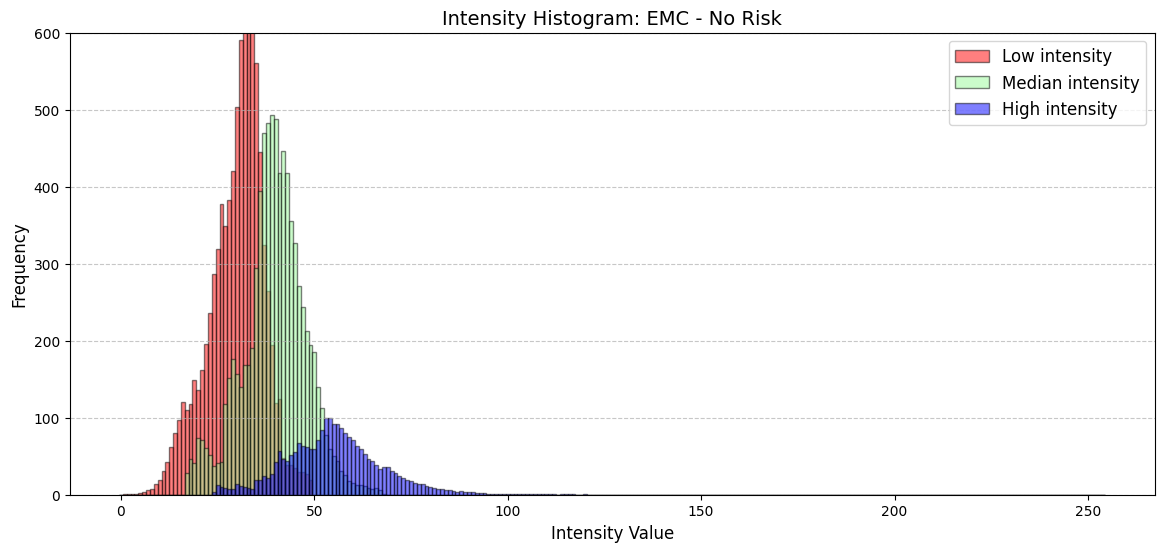

Skew:
Low intensity:  3.8461744680419168 Median intensity:  3.499868730920759 High intensity:  2.5778309015648286
Kurtosis:
Low intensity:  14.89804207396799 Median intensity:  11.932898879508063 High intensity:  5.888063411890029
Mean:
Low intensity:  30.893823231592652 Median intensity:  40.612143565080345 High intensity:  56.361871324303074
Std:
Low intensity:  7.065151398076053 Median intensity:  8.199428974793843 High intensity:  13.176303162759597


In [57]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_no_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_no_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='EMC - No Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

IU

In [63]:
center_low_grade = pd.merge(low_grade, center_dfs['iu'], on='name')
center_no_grade = pd.merge(none_grade, center_dfs['iu'], on='name')
center_high_grade = pd.merge(high_grade, center_dfs['iu'], on='name')

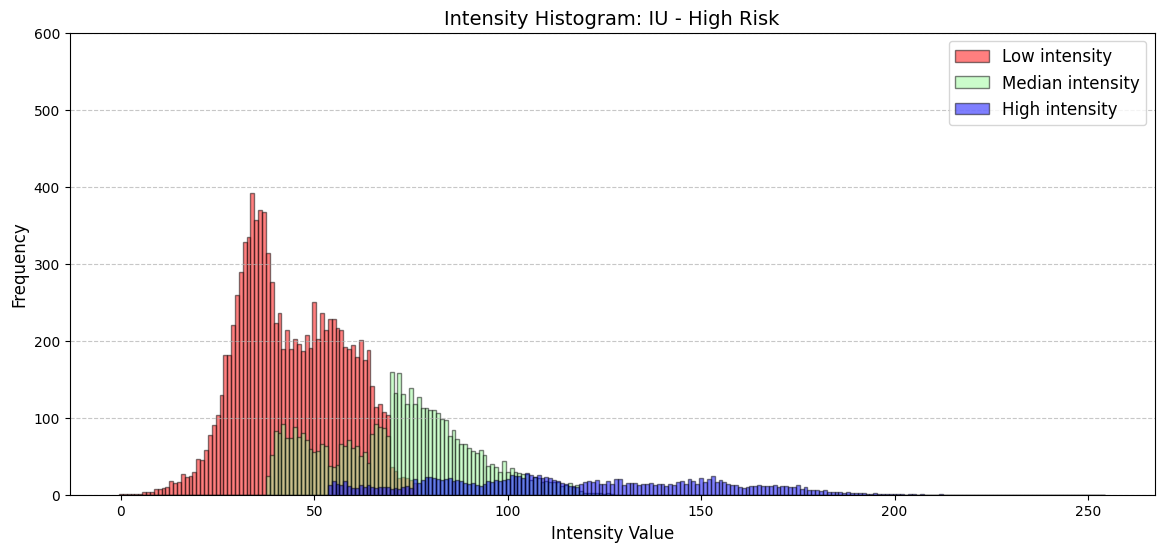

Skew:
Low intensity:  2.130412947669145 Median intensity:  1.7951474868931874 High intensity:  0.5171410357434204
Kurtosis:
Low intensity:  3.5008906124439356 Median intensity:  2.3747167110928764 High intensity:  -1.1142091138964278
Mean:
Low intensity:  45.071611895708855 Median intensity:  73.00066384532404 High intensity:  118.03428114899953
Std:
Low intensity:  13.393789682013352 Median intensity:  18.793422678827174 High intensity:  35.245773879106736


In [64]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='IU - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

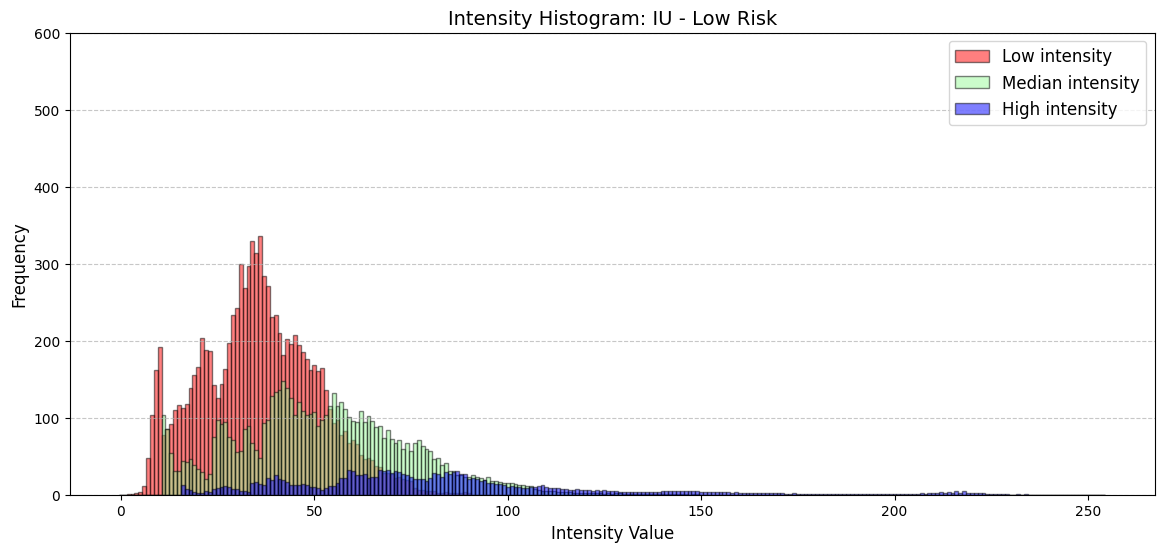

Skew:
Low intensity:  2.031484612910423 Median intensity:  1.3834833307831678 High intensity:  1.294785744230234
Kurtosis:
Low intensity:  3.160946126089775 Median intensity:  0.545816696976198 High intensity:  0.5151825024422871
Mean:
Low intensity:  36.735447472268106 Median intensity:  53.378566971123846 High intensity:  84.19077511833227
Std:
Low intensity:  15.064864272352786 Median intensity:  22.506462954931834 High intensity:  41.18191769364394


In [65]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='IU - Low Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

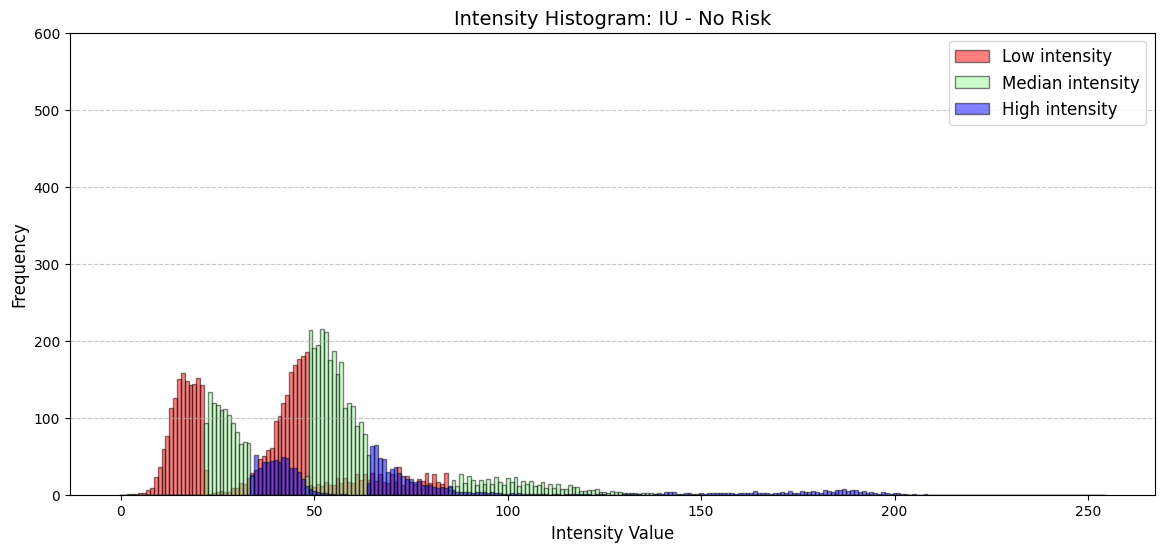

Skew:
Low intensity:  3.0697039241319315 Median intensity:  3.1215099174799934 High intensity:  2.9421548717834387
Kurtosis:
Low intensity:  8.561100832957937 Median intensity:  9.255897875944825 High intensity:  8.184641776641211
Mean:
Low intensity:  37.8270150273224 Median intensity:  54.65415699767944 High intensity:  74.11921492609643
Std:
Low intensity:  19.544329980737356 Median intensity:  24.0547827498207 High intensity:  43.48272203579766


In [66]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_no_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_no_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='IU - No Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

AHN

In [70]:
center_low_grade = pd.merge(low_grade, center_dfs['ahn'], on='name')
center_no_grade = pd.merge(none_grade, center_dfs['ahn'], on='name')
center_high_grade = pd.merge(high_grade, center_dfs['ahn'], on='name')

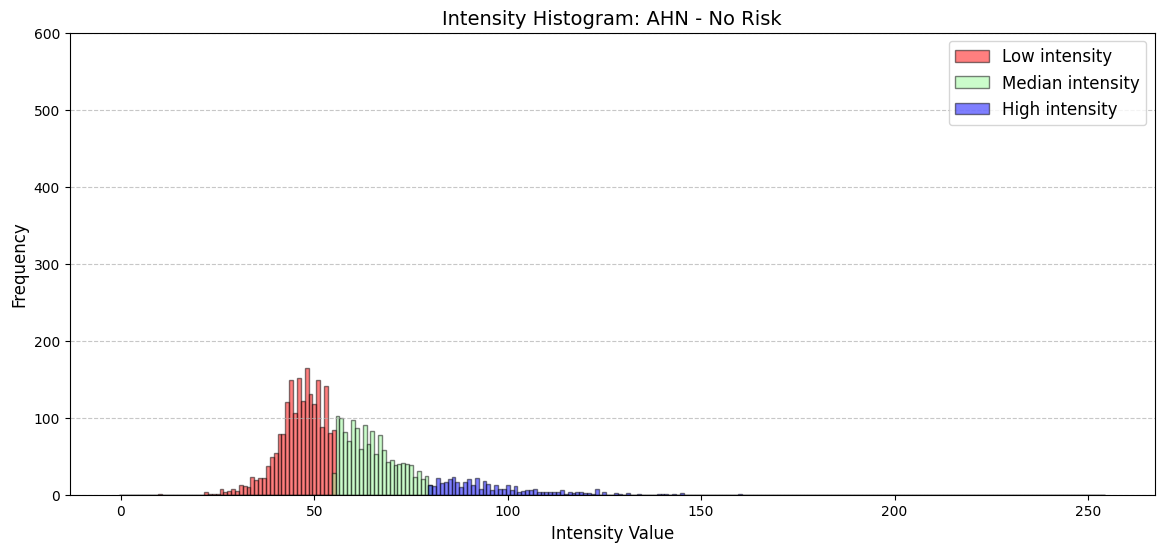

Skew:
Low intensity:  3.9014787174875414 Median intensity:  3.5525957875572063 High intensity:  3.1908275140715707
Kurtosis:
Low intensity:  14.455767960610281 Median intensity:  12.03947255872458 High intensity:  9.896254639079904
Mean:
Low intensity:  47.23712342079689 Median intensity:  65.67997247075017 High intensity:  96.64819277108434
Std:
Low intensity:  5.870082097733866 Median intensity:  6.570187899050992 High intensity:  13.363016410126013


In [71]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_no_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_no_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='AHN - No Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

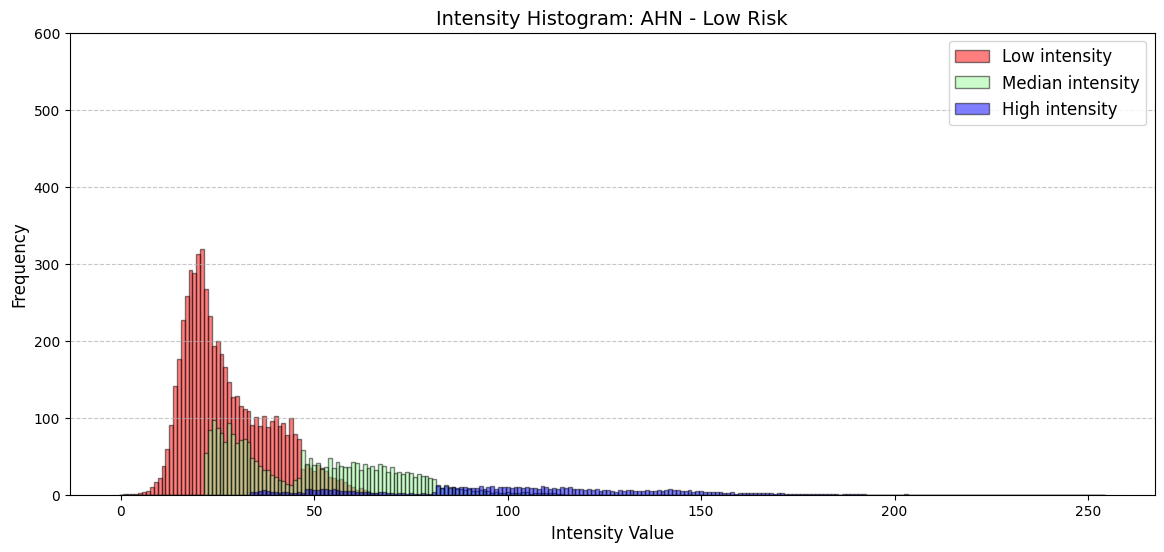

Skew:
Low intensity:  3.1316920801456023 Median intensity:  2.220723430748545 High intensity:  0.8945008227457645
Kurtosis:
Low intensity:  9.801269795867675 Median intensity:  4.61452183356185 High intensity:  -0.4122719537175761
Mean:
Low intensity:  28.428248393324694 Median intensity:  49.526074247296116 High intensity:  103.97720455908818
Std:
Low intensity:  11.298827945547615 Median intensity:  20.387806394251083 High intensity:  35.305424309400586


In [72]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='AHN - Low Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

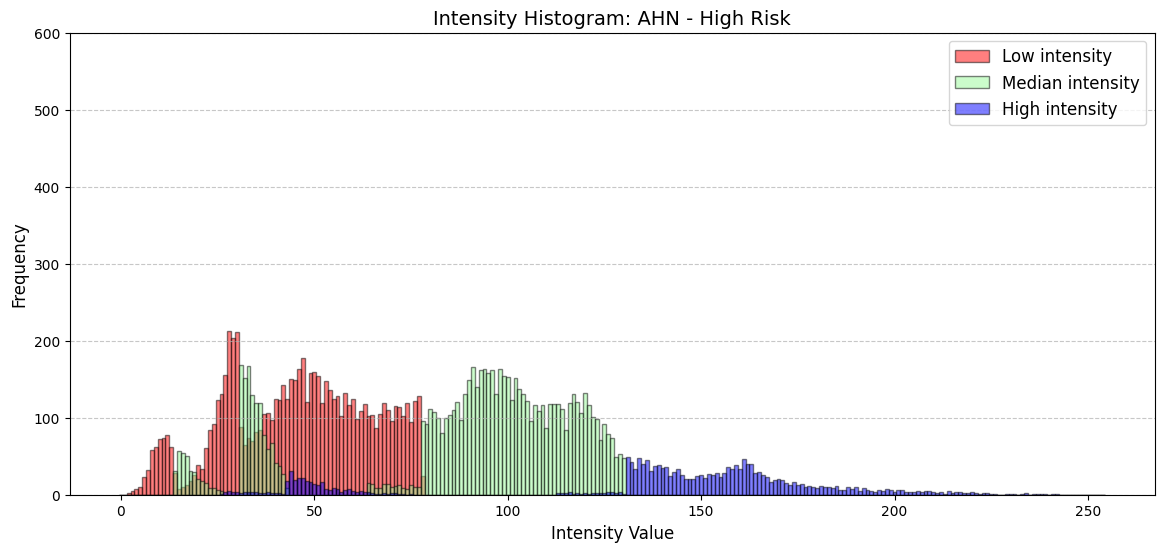

Skew:
Low intensity:  1.5780326311621116 Median intensity:  1.4143542154291524 High intensity:  1.7596327546031394
Kurtosis:
Low intensity:  1.2265359498246138 Median intensity:  0.4413192602716558 High intensity:  2.150936439110911
Mean:
Low intensity:  46.923554898733755 Median intensity:  88.84497075834437 High intensity:  140.9820480404551
Std:
Low intensity:  18.449392300980225 Median intensity:  31.088485244827847 High intensity:  45.3196868260399


In [73]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='AHN - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

NYU

In [74]:
center_low_grade = pd.merge(low_grade, center_dfs['nyu'], on='name')
center_no_grade = pd.merge(none_grade, center_dfs['nyu'], on='name')
center_high_grade = pd.merge(high_grade, center_dfs['nyu'], on='name')

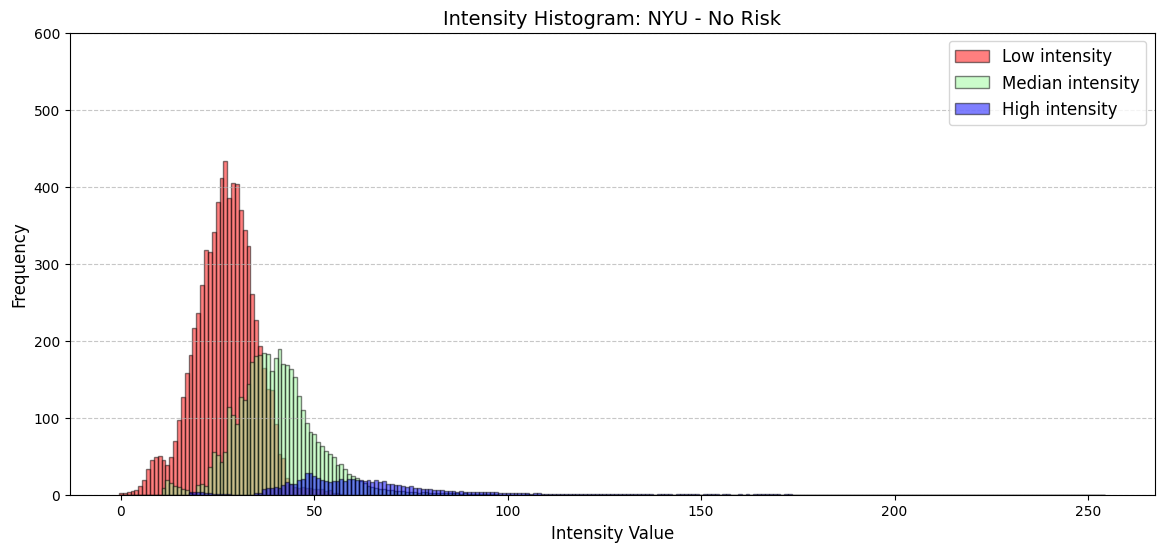

Skew:
Low intensity:  3.229206306928361 Median intensity:  2.8552421165868096 High intensity:  2.1199777170307263
Kurtosis:
Low intensity:  9.478292731004396 Median intensity:  7.107669456228038 High intensity:  3.5171541381116986
Mean:
Low intensity:  27.971996590315396 Median intensity:  41.3433517261585 High intensity:  65.18831024520335
Std:
Low intensity:  7.759124039862089 Median intensity:  11.018989380873606 High intensity:  24.5280161391701


In [75]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_no_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_no_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NYU - No Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

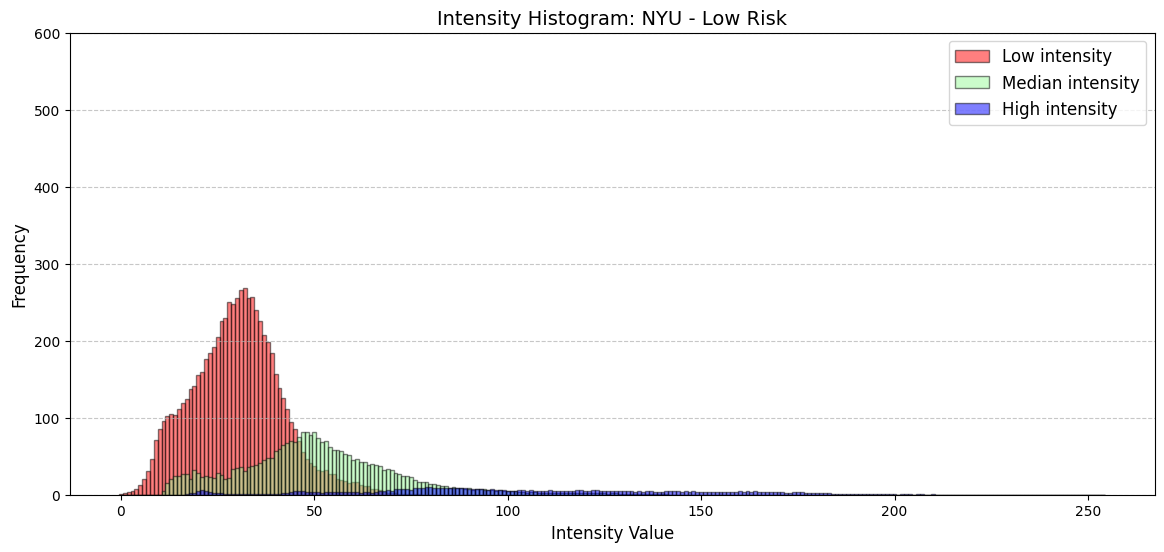

Skew:
Low intensity:  2.4634733375355267 Median intensity:  1.8171243118589842 High intensity:  0.5537448443718291
Kurtosis:
Low intensity:  4.947032781798265 Median intensity:  2.3659231077546377 High intensity:  -0.5534918128740616
Mean:
Low intensity:  31.0062231433656 Median intensity:  52.038306685444454 High intensity:  105.87319403383943
Std:
Low intensity:  11.56766362477957 Median intensity:  21.17435125582402 High intensity:  42.560518401415955


In [76]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NYU - Low Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

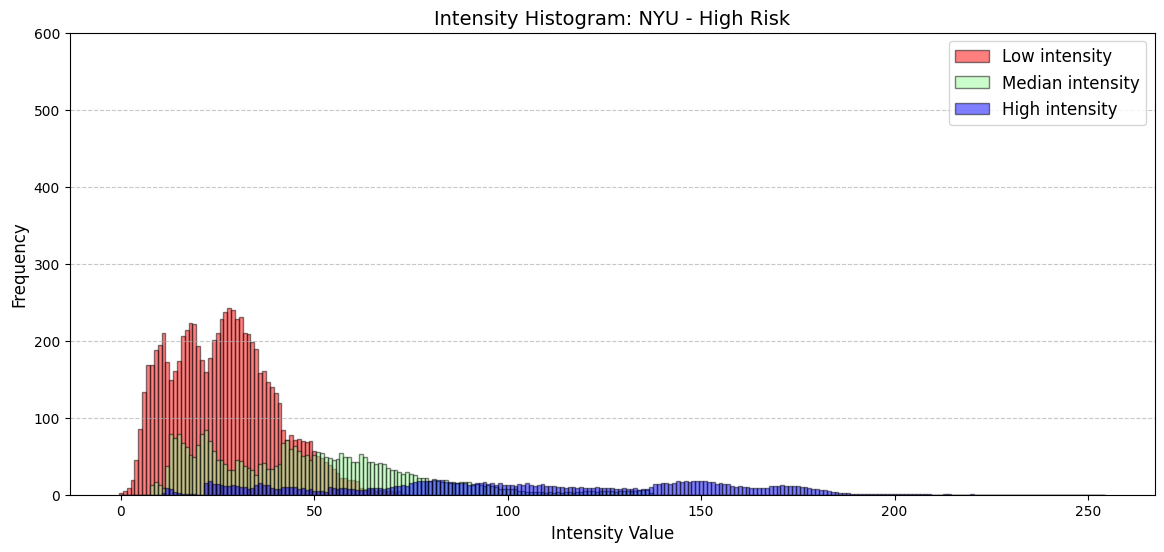

Skew:
Low intensity:  2.018025189815138 Median intensity:  1.4019213884692991 High intensity:  0.08380175484970982
Kurtosis:
Low intensity:  2.5279748047021364 Median intensity:  0.8068769146766259 High intensity:  -1.2777572666864225
Mean:
Low intensity:  27.48596993408063 Median intensity:  49.56205910173567 High intensity:  104.75136564261679
Std:
Low intensity:  13.33251480797882 Median intensity:  27.05032725792754 High intensity:  47.50083543004926


In [77]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='NYU - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

MCA

In [13]:
center_low_grade = pd.merge(low_grade, center_dfs['mca'], on='name')
center_no_grade = pd.merge(none_grade, center_dfs['mca'], on='name')
center_high_grade = pd.merge(high_grade, center_dfs['mca'], on='name')

In [14]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_no_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_no_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='MCA - No Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

/var/folders/9h/n7423dz95lv3x1z3vnm52bqr0000gs/T/ipykernel_79848/2459744262.py:17: RuntimeWarning: invalid value encountered in divide
  avg_cluster_1 = avg_cluster_1/len(sub_list)
/var/folders/9h/n7423dz95lv3x1z3vnm52bqr0000gs/T/ipykernel_79848/2459744262.py:18: RuntimeWarning: invalid value encountered in divide
  avg_cluster_2 = avg_cluster_2/len(sub_list)
/var/folders/9h/n7423dz95lv3x1z3vnm52bqr0000gs/T/ipykernel_79848/2459744262.py:19: RuntimeWarning: invalid value encountered in divide
  avg_cluster_3 = avg_cluster_3/len(sub_list)


ValueError: need at least one array to concatenate

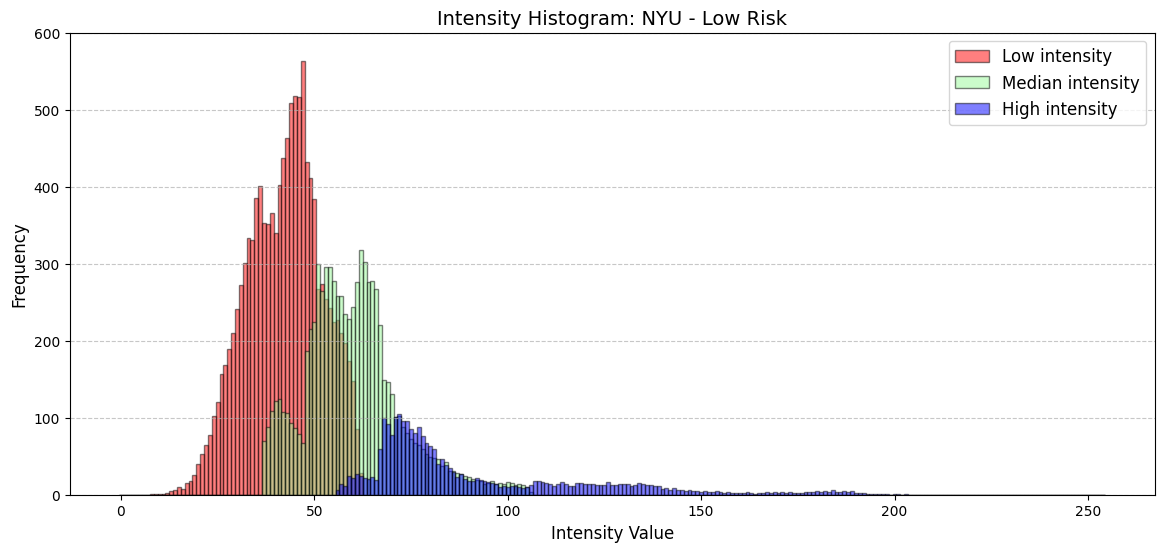

Skew:
Low intensity:  2.6021700993797694 Median intensity:  2.586753426013445 High intensity:  3.0875053160933414
Kurtosis:
Low intensity:  5.770482901707924 Median intensity:  5.598373473956277 High intensity:  9.440132876239314
Mean:
Low intensity:  43.088042853034224 Median intensity:  61.11562126589502 High intensity:  92.51488176505926
Std:
Low intensity:  9.608731801740348 Median intensity:  12.741107252103973 High intensity:  29.570976785575233


In [81]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='MCA - Low Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

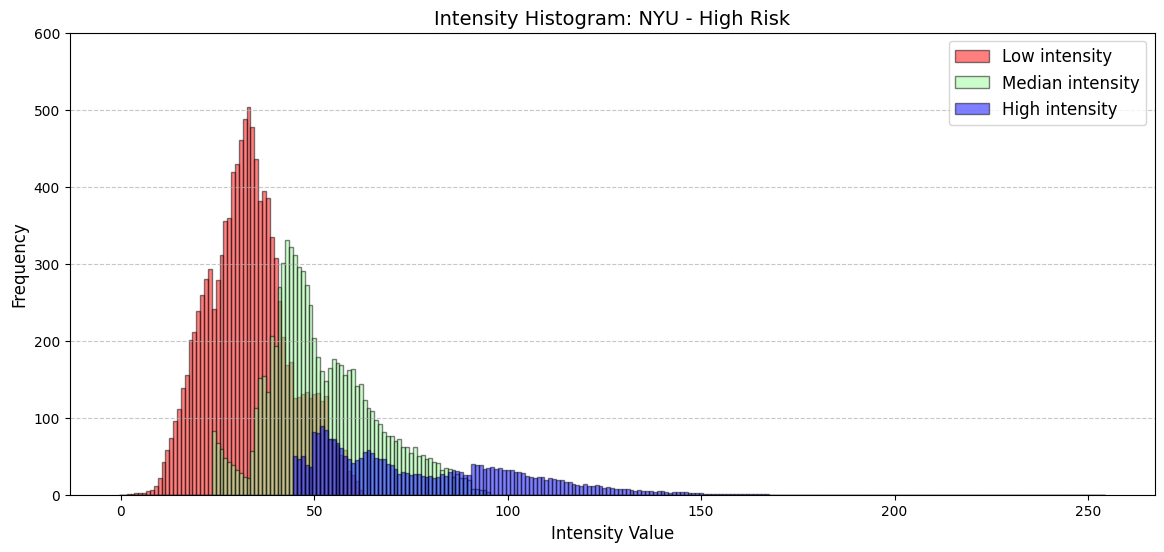

Skew:
Low intensity:  2.681865958243167 Median intensity:  2.593237451775443 High intensity:  1.8309451427391505
Kurtosis:
Low intensity:  6.38056977954847 Median intensity:  6.324997130378998 High intensity:  3.0249628749340784
Mean:
Low intensity:  33.89641590956338 Median intensity:  52.86351664517966 High intensity:  79.16168996188055
Std:
Low intensity:  10.472604216934677 Median intensity:  13.95290232508487 High intensity:  25.235044382695936


In [82]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='MCA - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

MCF

In [83]:
center_low_grade = pd.merge(low_grade, center_dfs['mcf'], on='name')
center_no_grade = pd.merge(none_grade, center_dfs['mcf'], on='name')
center_high_grade = pd.merge(high_grade, center_dfs['mcf'], on='name')

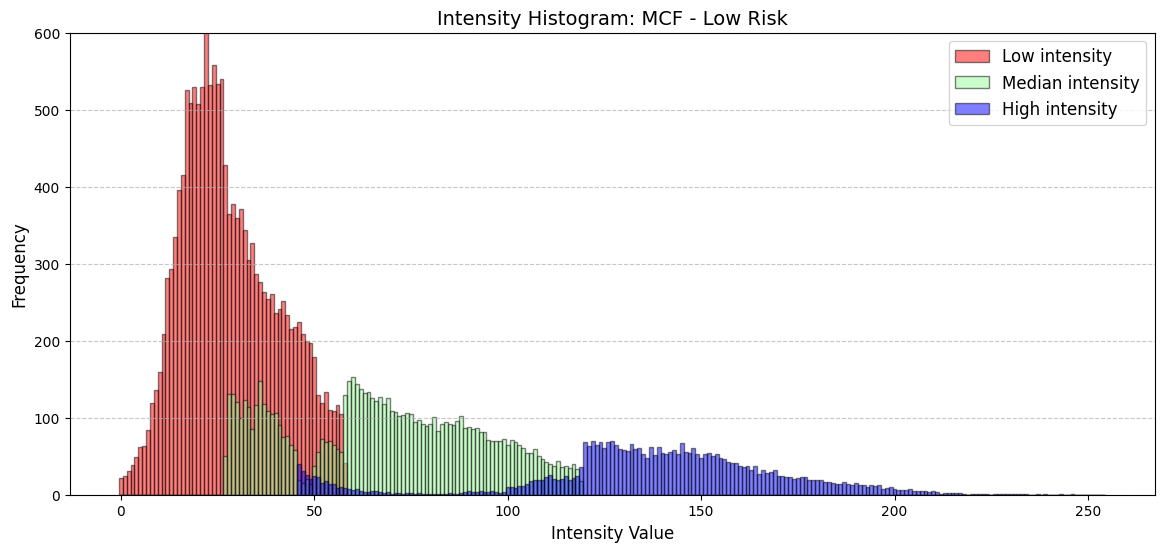

Skew:
Low intensity:  2.3262540031959853 Median intensity:  1.1208305428796117 High intensity:  1.3155725745374127
Kurtosis:
Low intensity:  4.495632609841749 Median intensity:  -0.22054387650180285 High intensity:  0.4417380695258215
Mean:
Low intensity:  29.18044758539458 Median intensity:  69.21984867754522 High intensity:  138.49570406738053
Std:
Low intensity:  12.520304997646111 Median intensity:  24.618462453381017 High intensity:  34.46614318101204


In [88]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_low_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_low_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='MCF - Low Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))

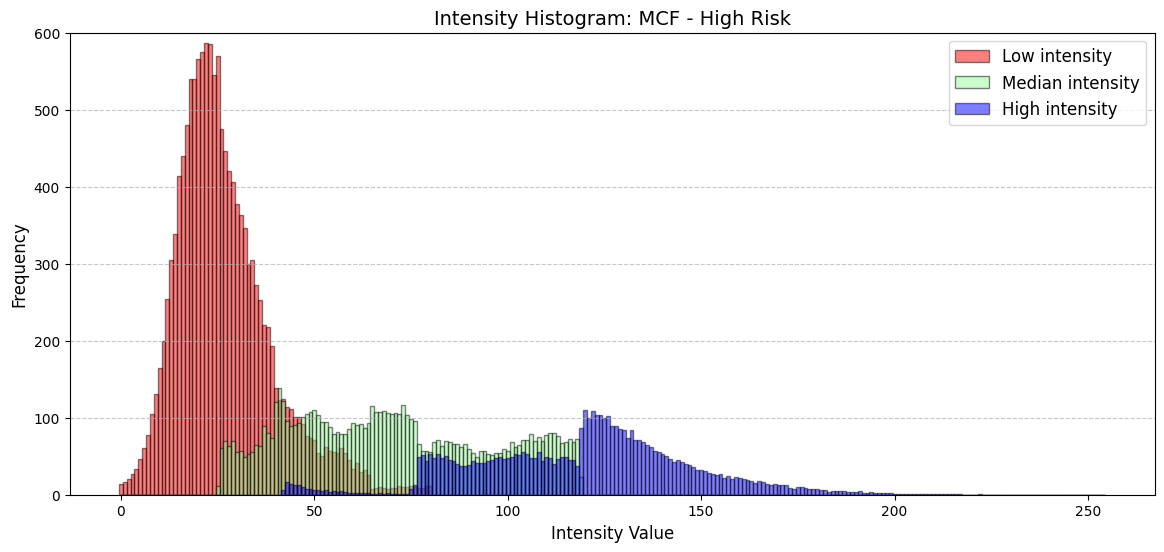

Skew:
Low intensity:  2.7148275185547663 Median intensity:  0.8606892405310842 High intensity:  1.4469158785499392
Kurtosis:
Low intensity:  6.415217401153985 Median intensity:  -0.8342088913003267 High intensity:  1.3817051372112834
Mean:
Low intensity:  27.834138232625854 Median intensity:  70.97525622254759 High intensity:  120.48327154917293
Std:
Low intensity:  12.565267248169196 Median intensity:  25.891023337858158 High intensity:  28.069673749993495


In [89]:
avg_1,avg_2,avg_3= get_avg_cluster_hist(lowercase_dict,sub_list=list(center_high_grade['name']))
total_1,total_2,total_3= get_total_cluster(lowercase_dict,sub_list=list(center_high_grade['name']))
plot_clusters(avg_1,avg_2,avg_3,title='MCF - High Risk',hight=600)
print("Skew:\nLow intensity: ",skew(avg_1),"Median intensity: ",skew(avg_2),"High intensity: ",skew(avg_3))
print("Kurtosis:\nLow intensity: ",kurtosis(avg_1),"Median intensity: ",kurtosis(avg_2),"High intensity: ",kurtosis(avg_3))
print("Mean:\nLow intensity: ",np.mean(total_1[total_1 != 0]),"Median intensity: ",np.mean(total_2[total_2 != 0]),"High intensity: ",np.mean(total_3[total_3 != 0]))
print("Std:\nLow intensity: ",np.std(total_1[total_1 != 0]),"Median intensity: ",np.std(total_2[total_2 != 0]),"High intensity: ",np.std(total_3[total_3 != 0]))